<a href="https://colab.research.google.com/github/hyulianton/jejaringsosial/blob/master/js_Analisis_Menggunakan_NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementasi Perhitungan Metrik Jaringan

Mari kita mulai dengan membuat sebuah jaringan sederhana di Google Colab/Jupyter Notebook dan menghitung semua metrik yang baru saja kita pelajari.

### **Langkah 1: Setup dan Membuat Jaringan Random Kecil**

Kita akan menggunakan model **Erdős–Rényi ($G(N, p)$)** sebagai contoh jaringan acak (*Random Network*).


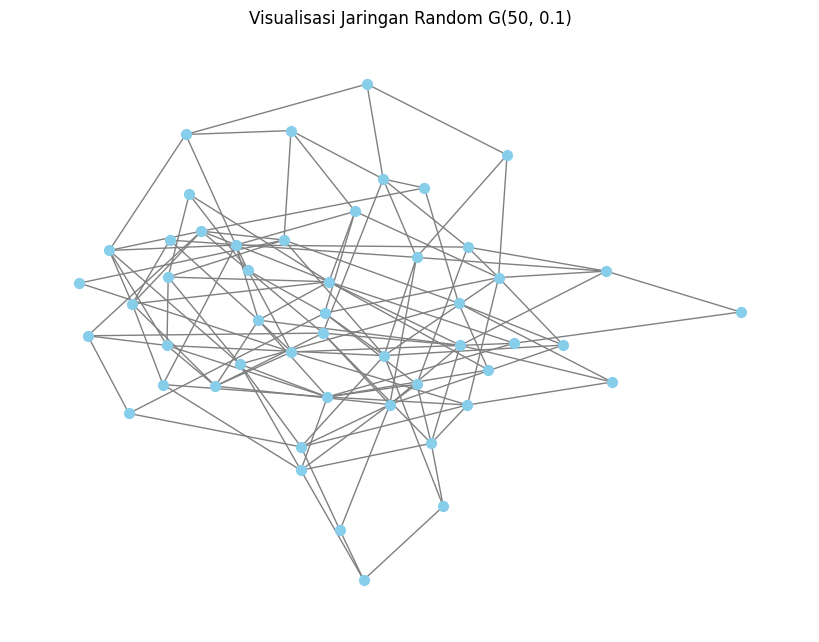

Jumlah Node: 50
Jumlah Edge: 129


In [1]:
# Import library yang diperlukan
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# --- 1. MEMBUAT JARINGAN ---
# Membuat Jaringan Random (G(N, p))
N = 50  # Jumlah node (simpul)
p = 0.1 # Probabilitas koneksi antar pasangan node
G = nx.erdos_renyi_graph(N, p)

# Tampilkan visualisasi dasar
plt.figure(figsize=(8, 6))
nx.draw_spring(G, node_size=50, node_color='skyblue', edge_color='gray', with_labels=False)
plt.title(f"Visualisasi Jaringan Random G({N}, {p})")
plt.show()

print(f"Jumlah Node: {G.number_of_nodes()}")
print(f"Jumlah Edge: {G.number_of_edges()}")

### **Langkah 2: Menghitung Metrik Dasar**

NetworkX membuat perhitungan metrik yang rumit menjadi semudah satu baris kode\!


In [2]:
# --- 2. PERHITUNGAN METRIK ---

# 1. Derajat (Degree) dan Rata-rata Derajat
# Hitung derajat untuk setiap node
degrees = [val for (node, val) in G.degree()]
avg_degree = np.mean(degrees)
print(f"\nRata-rata Derajat (Average Degree): {avg_degree:.2f}")

# 2. Average Path Length (APL) dan Diameter
# Catatan: Ini hanya bekerja jika jaringan terhubung (is_connected = True)
if nx.is_connected(G):
    avg_path_length = nx.average_shortest_path_length(G)
    diameter = nx.diameter(G)
    print(f"Average Path Length (APL): {avg_path_length:.2f}")
    print(f"Diameter Jaringan: {diameter}")
else:
    # Jika tidak terhubung, kita hitung pada Largest Connected Component (LCC)
    lcc = max(nx.connected_components(G), key=len)
    G_lcc = G.subgraph(lcc)
    avg_path_length = nx.average_shortest_path_length(G_lcc)
    diameter = nx.diameter(G_lcc)
    print(f"APL (LCC): {avg_path_length:.2f}")
    print(f"Diameter (LCC): {diameter}")

# 3. Clustering Coefficient (Rata-rata Global)
avg_clustering_coefficient = nx.average_clustering(G)
print(f"Average Clustering Coefficient (C): {avg_clustering_coefficient:.4f}")


Rata-rata Derajat (Average Degree): 5.16
Average Path Length (APL): 2.51
Diameter Jaringan: 5
Average Clustering Coefficient (C): 0.0790


## Visualisasi Hasil: Distribusi Derajat

Untuk menentukan apakah jaringan kita benar-benar acak, kita harus memvisualisasikan **Distribusi Derajatnya** menggunakan histogram.

### **Langkah 3: Membuat Histogram Distribusi Derajat**


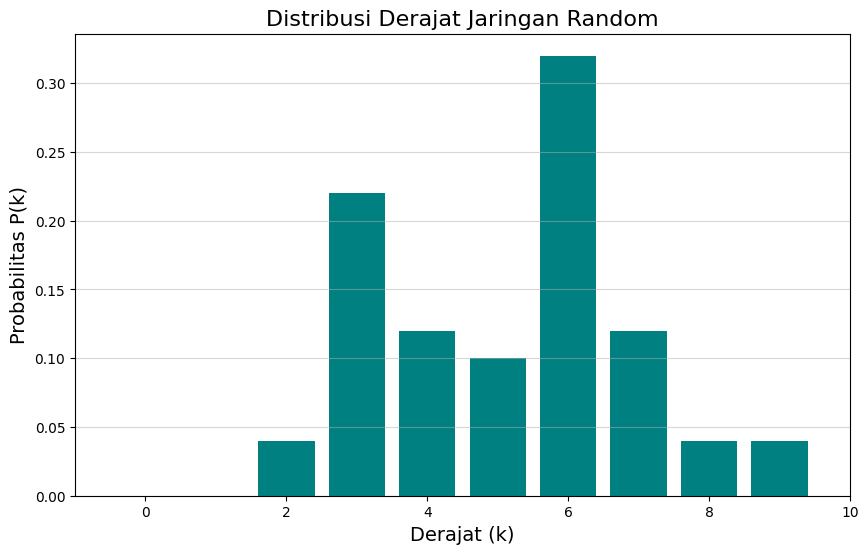

In [3]:
# --- 3. VISUALISASI DISTRIBUSI DERAJAT ---

# Kumpulkan semua nilai derajat
all_degrees = [val for (node, val) in G.degree()]

# Hitung frekuensi (probabilitas) setiap derajat
degree_counts = nx.degree_histogram(G)
# Normalisasi untuk mendapatkan probabilitas P(k)
N_nodes = G.number_of_nodes()
Pk = [float(c) / N_nodes for c in degree_counts]

# Buat plot histogram
plt.figure(figsize=(10, 6))
plt.bar(range(len(Pk)), Pk, width=0.8, color='teal')
plt.xlabel("Derajat (k)", fontsize=14)
plt.ylabel("Probabilitas P(k)", fontsize=14)
plt.title("Distribusi Derajat Jaringan Random", fontsize=16)
plt.xlim([-1, len(Pk)]) # Atur batas X untuk tampilan lebih rapi
plt.grid(axis='y', alpha=0.5)
plt.show()

### **Analisis Cepat Hasil Plot:**

Jika kurva hasil plot Anda berbentuk **genta (bell shape)**, maka Anda berhasil membuat **Jaringan Acak**\! Puncaknya harus berada di sekitar nilai **Rata-rata Derajat** yang Anda hitung.